

```
### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

```



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [ ]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
data = pd.read_csv('sample_data/fcc-forum-pageviews.csv',index_col='date',parse_dates=['date'])


In [ ]:
data.head(2)

,value
date,
2016-05-09,1201
2016-05-10,2329


In [ ]:
#Checking if there are any null values or not 
data.value.isnull().any()

False

In [ ]:
#shape 
data.shape

(1304, 1)

In [ ]:
data.value.quantile(0.025)

17876.4

In [ ]:
data.value.quantile(0.975)

177613.075

In [ ]:
data.describe().round(0)

,value
count,1304.0
mean,67221.0
std,59340.0
min,1201.0
25%,35758.0
50%,57198.0
75%,83883.0
max,1173655.0


In [ ]:
# * Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

requiredFilter = (data.value >=  data.value.quantile(0.025)) & (data.value <=  data.value.quantile(0.975))
data = data.loc[requiredFilter,:]
data.shape

(1238, 1)

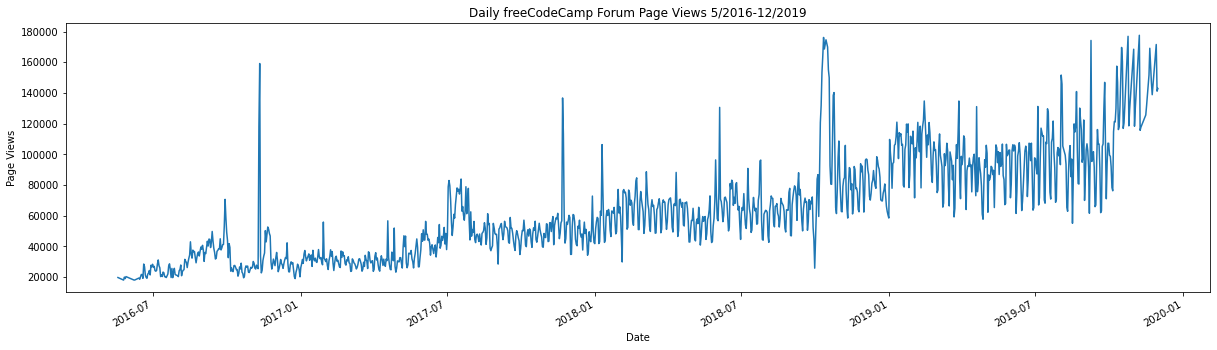

In [ ]:
# * Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
# The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

requiredData = data.loc['2016-05-01':'2019-12-01',:]
plt.plot(requiredData.index , requiredData.value)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

fig = plt.gcf()
fig.set_size_inches(20.5,5.5)
fig.autofmt_xdate() 




In [ ]:
#* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png".
# It should show average daily page views for each month grouped by year.
# The legend should show month labels and have a title of "Months".
# On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

#Grouping by YEAR AND MONTH and getting mean , (dont use month_name()!)

df = data.groupby([data.index.year,data.index.month]).value.mean()
df.head(3)



date  date
2016  5       19432.400000
      6       21875.105263
      7       24109.678571
Name: value, dtype: float64

In [ ]:
# Renaming Index
df.index.rename(['Years','Months'],inplace=True)
df.head(3)

Years  Months
2016   5         19432.400000
       6         21875.105263
       7         24109.678571
Name: value, dtype: float64

In [ ]:
# Unstcking to get DF
df = df.unstack()
df.head(3)


Months,1,2,3,4,5,6,7,8,9,10,11,12
Years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871


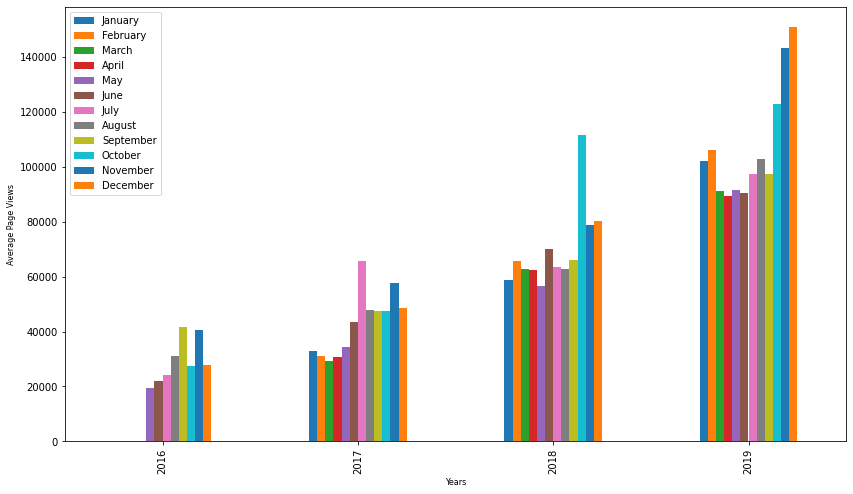

In [ ]:
#Plotting 
fig = df.plot(kind ="bar", legend = True, figsize = (14,8)).figure
plt.xlabel("Years", fontsize= 8)
plt.ylabel("Average Page Views", fontsize= 8)
plt.legend(fontsize = 10, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])



In [ ]:
# Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png".
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
# The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".
# Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

df.describe()

Months,1,2,3,4,5,6,7,8,9,10,11,12
count,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,64473.924731,67586.809524,61092.451613,60866.000000,50419.866129,56501.312030,62686.037116,61077.642102,63016.058333,77254.361961,80001.240476,76758.495968
std,35009.756587,37464.092845,30953.774435,29273.107096,31316.940366,30016.244935,29957.931660,30644.599439,25102.027463,46952.608666,44919.368117,53789.457085
min,32785.161290,31113.071429,29369.096774,30878.733333,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
25%,45682.629032,48396.035714,46031.435484,46614.783333,30541.317742,38151.901316,53720.718030,43546.637097,45901.816667,42428.612903,53388.333333,43273.540323
50%,58580.096774,65679.000000,62693.774194,62350.833333,45403.580645,56847.250000,64698.951613,55272.032258,56659.266667,79408.426267,68194.950000,64234.032258
75%,80318.306452,85823.678571,76954.129032,75859.633333,65282.129032,75196.660714,73664.270699,72803.037264,73773.508333,114234.175325,94807.857143,97718.987903
max,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000
